# 

# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [6]:
# only library allowed do not modify
from src.sql import execute_query

In [7]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM train_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,7484,9996,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,train
1,1,3593,2338,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,train
2,2,12246,5091,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,train
3,3,5237,10266,None,16-03-2020,My food stock is not the only one which is emp...,Positive,train
4,4,14067,3014,None,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,train
...,...,...,...,...,...,...,...,...
41152,41152,10280,14781,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,train
41153,41153,10605,1158,None,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,train
41154,41154,4884,1029,None,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,train
41155,41155,9052,7736,None,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,train


In [8]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,5663,6254,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,test
1,1,12784,7766,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,test
2,2,3859,7150,None,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,test
3,3,6815,9068,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,test
4,4,1381,8708,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,test
...,...,...,...,...,...,...,...,...
3793,3793,7916,11906,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,test
3794,3794,14679,3726,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,test
3795,3795,6342,3112,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,test
3796,3796,13676,1776,None,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,test


## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [68]:
# write query inside docstring
query_1 = """
 SELECT 
        userName UserName,
        Location,
        COUNT(*) count
    FROM
        train_table
    WHERE                     --Clausula agregada porque:  
         Location IS NOT NULL --en ejemplo no se muestra Location en None
    GROUP BY 
        userName,
        Location

    ORDER BY 
      COUNT(*) DESC
    LIMIT 10

"""

In [69]:
result_1 = execute_query(query_1)

In [70]:
result_1

,UserName,Location,count
0,647,"England, United Kingdom",2
1,1013,"London, England",2
2,1189,"Boston, MA",2
3,1506,"London, England",2
4,1557,Los Angeles,2
5,1617,United States,2
6,1758,Nowhere,2
7,1982,"New York, NY",2
8,2002,"London, England",2
9,2129,London,2


## Question 2: Intermediate SQL


In [114]:
# write query inside docstring
query_2 = """
WITH DATASET AS (
SELECT
    userName,
    SUM(CASE WHEN Sentiment="Positive" THEN 1 ELSE 0 END) pos_count,
    SUM(CASE WHEN Sentiment="Negative" THEN 1 ELSE 0 END) neg_count,
    SUM(CASE WHEN Sentiment="Extremely Positive" THEN 1 ELSE 0 END) extremely_pos_count,
    SUM(CASE WHEN Sentiment="Extremely Negative" THEN 1 ELSE 0 END) extremely_neg_count
FROM
    train_table
GROUP BY userNAme
)
SELECT * FROM DATASET
    
"""

In [115]:
result_2 = execute_query(query_2)

In [116]:
result_2

,userName,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,0,1,0,0,0
1,1,2,0,2,0
2,2,0,1,0,0
3,3,1,0,0,1
4,4,1,0,1,0
...,...,...,...,...,...
13994,14978,0,0,0,1
13995,14979,1,0,2,0
13996,14980,2,0,0,0
13997,14981,2,0,0,0


## Question 3: Medium SQL

In [186]:
query_3 = """
SELECT 
    TweetAt,
count(*)
from train_table
GROUP BY TweetAt
"""

In [194]:
# write query inside docstring
query_3 = """
SELECT 
    CAST(TweetAt AS VARCHAR) TweetAt,
    SUM(
    CASE 
        WHEN Sentiment="Positive" THEN 1.0
        WHEN Sentiment="Extremely Negative" THEN 1.0 
        ELSE 0 
    END)
    /
    SUM(CASE WHEN TRUE THEN 1.0 END) pos_rate
FROM train_table
GROUP BY TweetAt
"""

In [195]:
result_3 = execute_query(query_3)

In [196]:
result_3

,TweetAt,pos_rate
0,01-04-2020,0.412698
1,02-04-2020,0.387841
2,03-04-2020,0.408642
3,04-04-2020,0.449804
4,05-04-2020,0.376658
5,06-04-2020,0.389208
6,07-04-2020,0.405860
7,08-04-2020,0.410420
8,09-04-2020,0.400408
9,10-04-2020,0.400000


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

In [213]:
import pandas as pd
def plot(df : pd.DataFrame):
    #TODO: YOUR CODE GOES HERE
    df['TweetAt'] = pd.to_datetime(df['TweetAt'], format ="%d-%m-%Y")
    df=df.resample(rule='D', on='TweetAt').mean()
    df.plot()
    
    

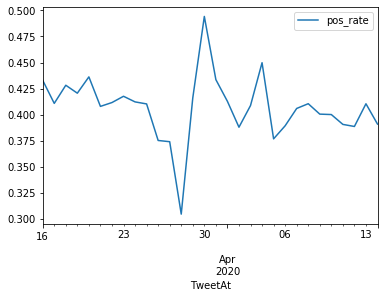

In [214]:
plot(result_3)

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5

In [ ]:
prueba=DataReader(filepath='C:/Users/andyl/Desktop/prueba_ingeniero_de_datos/data/malformed_dataset.csv').read_csv()
prueba.infer_dtypes()